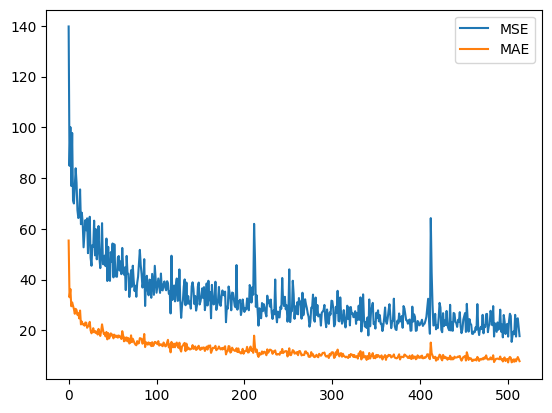

In [6]:
f =  "/home/home/weiyupeng/home/DM-Count/ckpts/1226-014435/train-1226-014435.log" # 1226-014435, vgg
f = "/home/home/weiyupeng/home/DM-Count/ckpts/1226-154506/train-1226-154506.log"
f = "/home/home/weiyupeng/home/DM-Count/ckpts/1226-135258/train-1226-135258.log"
f = "/home/home/weiyupeng/home/DM-Count/ckpts/1226-134424/train-1226-134424.log"
f = "/home/home/weiyupeng/home/DM-Count/ckpts/1226-133256/train-1226-133256.log"
f = "/home/home/weiyupeng/home/DM-Count/ckpts/1226-125919/train-1226-125919.log"
f = "/home/home/weiyupeng/home/DM-Count/ckpts/1226-125547/train-1226-125547.log"
MSE = []
MAE = []
with open(f, 'r') as f:
    for line in f.readlines():
        if "MSE" in line:
            MSE.append(float(line.split(",")[-2].split(" ")[2].strip()))
        if "MAE" in line:
            MAE.append(float(line.split(",")[-2].split(":")[-1].strip()))
from matplotlib import pyplot as plt
plt.plot(MSE)
plt.plot(MAE)
plt.legend(["MSE", "MAE"])
plt.show()


In [12]:
import os
import tqdm
for i in tqdm.tqdm(os.listdir("./generated/vgg/")):
    if("abf" in i):
        a = torch.load("/home/home/weiyupeng/home/DM-Count/generated/vgg/{}".format(i))
        a,b,f = a["a"], a["b"], a["f"]
        if b.shape == torch.Size([1, 64, 64]):
            b = b.reshape(-1)
            torch.save({
                "a" : a,
                "b" : b, 
                "f" : f
            },
                "./generated/vgg/{}".format(i))

100%|██████████| 291740/291740 [37:20<00:00, 130.22it/s] 


In [6]:
import torch
a = "/home/home/weiyupeng/home/DM-Count/generated/vitb/abf-0-1-img_0997"
a = torch.load(a)
a,b,f = a["a"], a["b"], a["f"]


tensor([0.0010, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0009], device='cuda:0')

In [51]:
import torch
c_size = 512
stride = 8

cood = torch.arange(0, c_size, step=stride,
                                 dtype=torch.float32) + stride / 2
# im_points是所有格点的坐标
import numpy as np
img_size = 64
x_grid = []

# for i in np.linspace(63, 0, num = img_size):
#     for j in np.linspace(0, 63, num = img_size):
#         x_grid.append([j, i])
for j in cood[::-1]:
        for i in cood:
            x_grid.append([i,j])                
x_grid = np.array(x_grid, dtype = np.float64)
x_grid = x_grid/ 512
x = x_grid; y = x_grid
def norm(x):
        return np.sum(x ** 2, axis=-1)
C = -2*x@y.T
C += norm(x)[:, np.newaxis] + norm(y)[np.newaxis, :]


ValueError: step must be greater than zero

In [52]:
def reverse(array):
    l = []
    while array != []:
        l.append(array.pop().item())
    return l
cood = torch.arange(0, c_size, step=stride,
                                 dtype=torch.float32) + stride / 2
# im_points是所有格点的坐标
import numpy as np
img_size = 64
x_grid = []
reverse(list(cood))
for j in reverse(list(cood)):
        for i in cood:
            x_grid.append([i,j])                
x_grid = np.array(x_grid, dtype = np.float64)
x_grid = x_grid/512

x = x_grid; y = x_grid
def norm(x):
        return np.sum(x ** 2, axis=-1)
C = -2*x@y.T
C += norm(x)[:, np.newaxis] + norm(y)[np.newaxis, :]


In [53]:
C

array([[0.00000000e+00, 2.44140625e-04, 9.76562500e-04, ...,
        1.87744141e+00, 1.90747070e+00, 1.93798828e+00],
       [2.44140625e-04, 0.00000000e+00, 2.44140625e-04, ...,
        1.84790039e+00, 1.87744141e+00, 1.90747070e+00],
       [9.76562500e-04, 2.44140625e-04, 0.00000000e+00, ...,
        1.81884766e+00, 1.84790039e+00, 1.87744141e+00],
       ...,
       [1.87744141e+00, 1.84790039e+00, 1.81884766e+00, ...,
        0.00000000e+00, 2.44140625e-04, 9.76562500e-04],
       [1.90747070e+00, 1.87744141e+00, 1.84790039e+00, ...,
        2.44140625e-04, 0.00000000e+00, 2.44140625e-04],
       [1.93798828e+00, 1.90747070e+00, 1.87744141e+00, ...,
        9.76562500e-04, 2.44140625e-04, 0.00000000e+00]])

In [54]:
C = torch.asarray(C,dtype = torch.float32)
torch.save(C, "./ground-metric-normed")
    

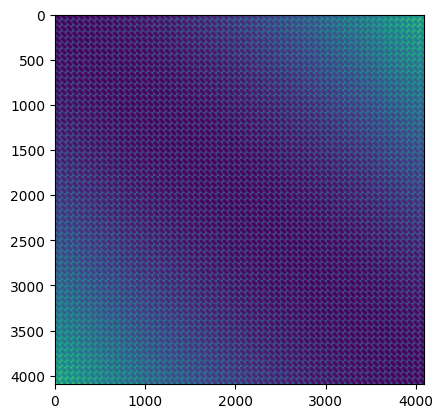

In [55]:
C = torch.load("./ground-metric-normed")
from matplotlib import pyplot as plt
plt.imshow(C)
plt.show()

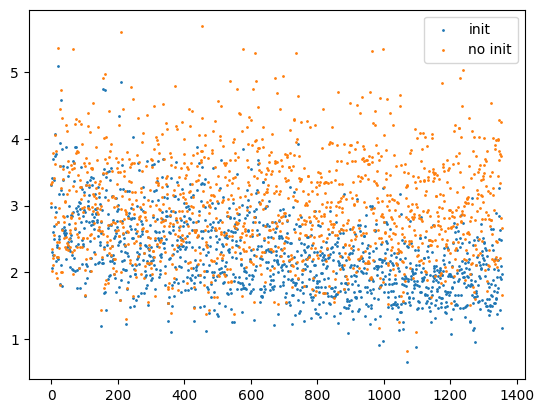

2.2467513384817073 2.973710957591783


In [9]:
f = "/home/home/weiyupeng/home/DM-Count/ckpt/1227-202315/train-1227-202315.log"
no_init = []
init = []
with open(f, 'r') as f:
    for line in f.readlines():
        if "INFO - True" in line:
            init.append(float(line.split(" ")[-1].strip()))
        if "INFO - False" in line:
            no_init.append(float(line.split(" ")[-1].strip()))
from matplotlib import pyplot as plt
plt.scatter(range(len(init)), init, s = 1)
plt.scatter(range(len(no_init)), no_init, s= 1)
plt.legend(["init", "no init"])
plt.show()
import numpy as np
print(np.mean(init), np.mean(no_init))